In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Isolation Forest


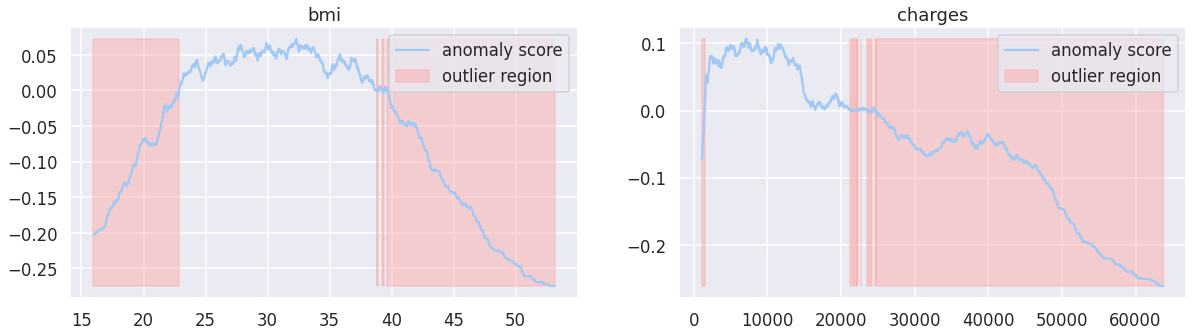

In [11]:
from sklearn.ensemble import IsolationForest
df = pd.read_csv('/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Anomaly_Detection (Final DMP)/insurance.csv')

cols = ['bmi', 'charges']
#Plotting the sub plot
fig, axs = plt.subplots(1, 2, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination= 0.18)
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)
  

# DBSCAN

In [86]:
df = pd.read_csv('/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Anomaly_Detection (Final DMP)/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
X = df[['F05','F07']].values

#db = DBSCAN(eps=0.033, min_samples=10).fit(X)
db = DBSCAN(eps=0.033, min_samples=10).fit(X)
labels = db.labels_
pd.Series(labels).value_counts()

 0    559
-1     10
dtype: int64

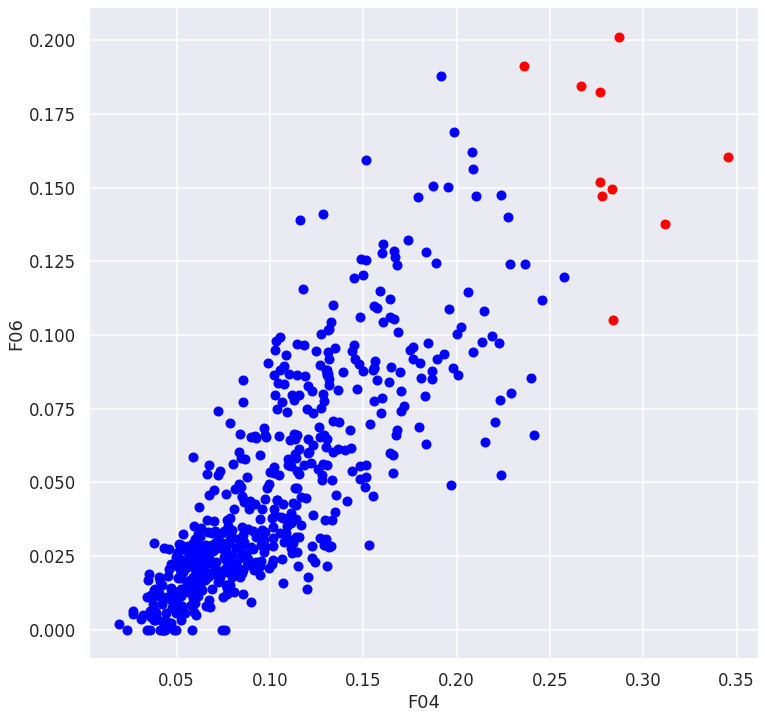

In [84]:

plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('F04');
plt.ylabel('F06');

# Z score


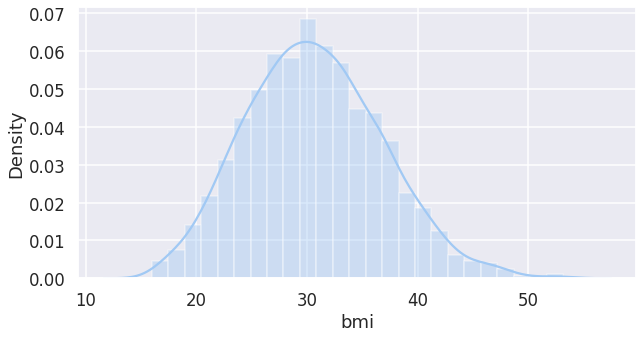

In [89]:
# Z score
plt.figure(figsize = (10,5))
sns.distplot(df['bmi'])

In [90]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [91]:
out_zscore(df.bmi)

Total number of outliers are 4


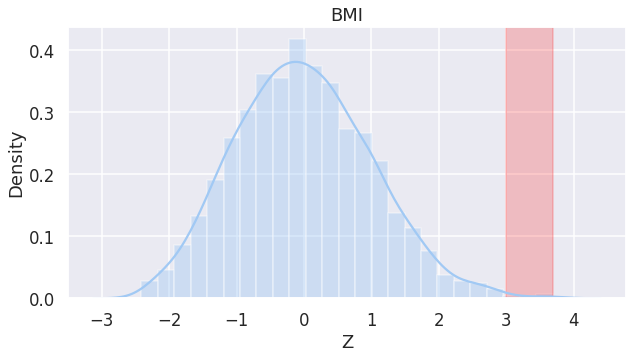

In [93]:
plt.figure(figsize = (10,5))
plt.xlabel("Z")
plt.title("BMI")
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')